In [4]:
import numpy as np
import control as cn
import Algorithms as alg
import matplotlib.pyplot as plt
from Algorithms import TUBScolorscale,cm2in

MSC = lambda MS, color: plt.Circle((-1 ,0),1/MS, color =color, alpha=0.4)
MTC = lambda MT, color: plt.Circle((-MT**2/(MT**2 - 1),0),MT/(MT**2 -1), color =color, alpha = 0.4)
MCC = lambda M : plt.Circle((-(2*M**2-2*M+1)/(2*M*(M-1)),0), (2*M-1)/(2*M*(M-1)), color = 'b', fill = None,linestyle = 'dashed', alpha = 0.3)
MC = lambda MS,MT,color: plt.Circle((-(MS*(2*MT-1)-MT+1)/(2*MS*(MT-1)),0),(MS+MT-1)/(2*MS*(MT-1)), color =color, alpha = 0.3)

90.0
0.0
(1, 1.0006060648339976, 0.99999967450226546)
45.0
0.842325152664
(2, 1.2037070034827828, 0.99999975419021991)
30.0
1.0
(3, 1.2255139497853189, 0.99999933980248668)
22.5
1.0
(4, 1.2504039460839662, 0.99999919537906623)
18.0
1.0
(5, 1.2775463209790872, 0.99999921466130826)
15.0
1.0
(6, 1.3036356005223686, 0.99999928091400914)
12.8571428571
1.0
(7, 1.3272747425539044, 0.99999934964172288)
11.25
1.0
(8, 1.3481414640353269, 0.99999940956632472)
10.0
1.0
(9, 1.3663685549208739, 0.99999945929759571)


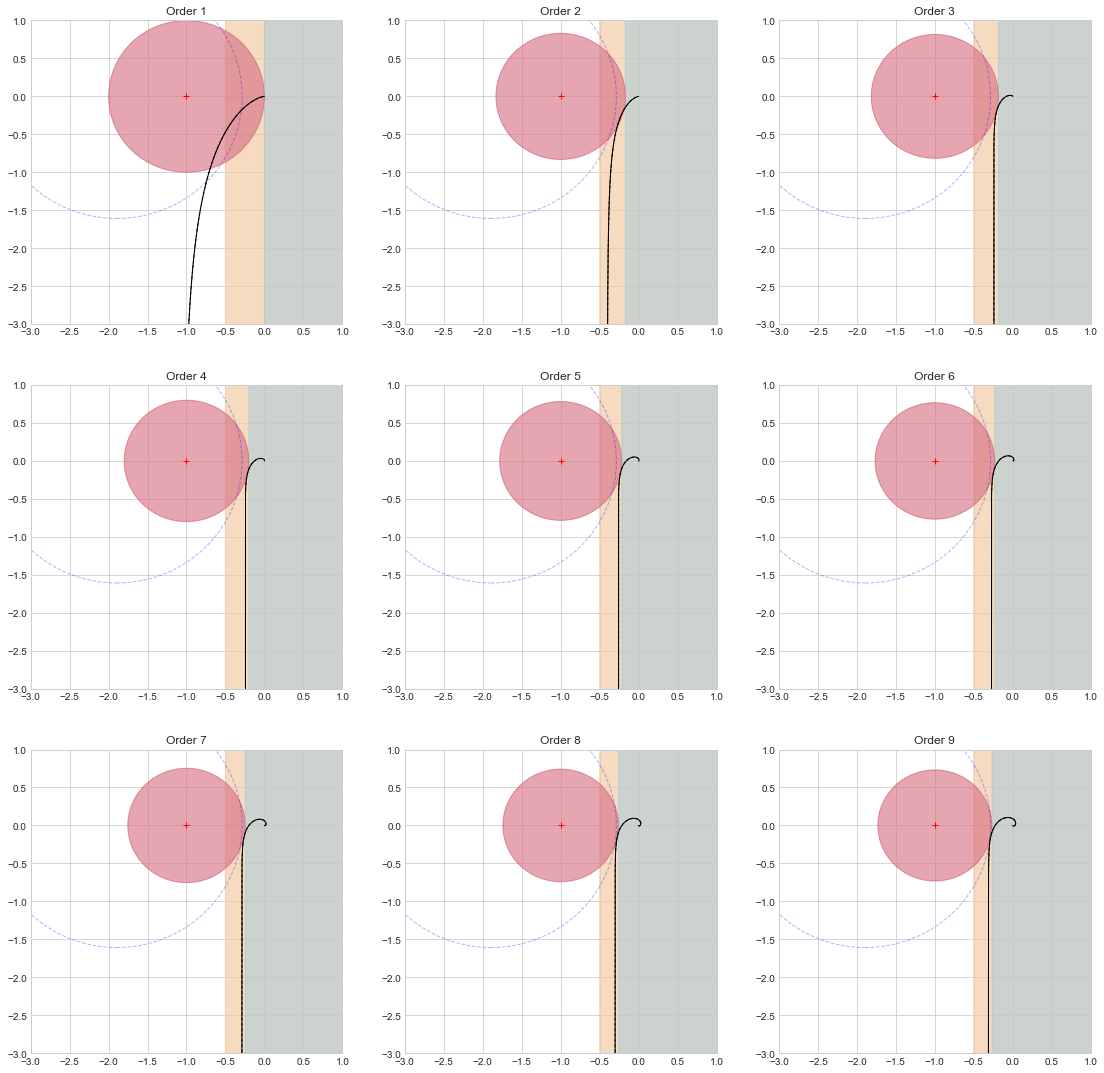

In [7]:
# Plot width and heigth in cm
plot_width = 19.
plot_height = 7.5

# Matplotlib plot
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')

# Make a system with TSum = 100 and T = TSum/order
TSum = 90.
L = 0
plt.clf()
fig, ax = plt.subplots(3,3,figsize=(plot_width,plot_width))
row = 0
col = 0
for order in range(1,10):
    # Get the current time constant
    T = TSum/order
    print(T)
    # Make a transfer function
    G = cn.tf(1,[T,1])
    G = 1*G**order
    num,den = cn.pade(L,10)
    G = G*cn.tf(num,den)
    # Step experiment
    t = np.linspace(0,300,3000)
    y,t = cn.step(G,t)
    u = np.ones_like(t)
    # FOTD identification
    k,t,l = alg.Integral_Identification(y,u,t)
    # Make a controller
    c, b = alg.AMIGO_Tune(k,t,l)
    print(b)
    KY = cn.tf(c[0],1)+cn.tf(c[1],[1,0])
    KR = cn.tf(b*c[0],1)+cn.tf(c[1],[1,0])
    KR2 = cn.tf(c[0],1)+cn.tf(c[1],[1,0])
    # Open Loop
    OL = G*KR
    OL2 = G*KR2
    # Compute the sensitivity
    S = 1/(1+G*KY)
    # Complementary
    T = G*KR/(1+G*KY)
    # Compute the Open Loop Nyquist Plot
    real,imag, w = cn.nyquist(OL, np.logspace(-5,5,10000), Plot=False)
    real2,imag2,w = cn.nyquist(OL2,np.logspace(-5,5,1000), Plot=False)
    ax[row,col].cla()
    ax[row,col].plot(real,imag, color = TUBScolorscale[0], linewidth = 1)
    ax[row,col].plot(real,imag, color = TUBScolorscale[0], linestyle="dashed", linewidth = 1)
    # Compute the maximum Sensitivity
    mag, phase, freq = cn.freqresp(S, np.logspace(-5,5,10000))
    #plt.loglog(freq,mag)
    MS = np.max(mag)
    # Compute the maximum Complementary Sensitivity
    mag, phase, freq = cn.freqresp(T,  np.logspace(-5,5,10000))
    MT = np.max(mag)
    print(order,MS,MT)
    # Compute the circles
    # Complementary Sensitivity
    ax[row,col].add_artist(MTC(MT, TUBScolorscale[3]))
    # Complementary Sensitivity + Sensitivity
    ax[row,col].add_artist(MC(MS,MT,'w'))
    ax[row,col].add_artist(MC(MS,MT,TUBScolorscale[9]))
    # Make white space
    ax[row,col].add_artist(MTC(MT, 'w'))
    ax[row,col].add_artist(MSC(MS, 'w'))
    # Sensitivity
    ax[row,col].add_artist(MSC(MS, TUBScolorscale[1]))
    ax[row,col].add_artist(MCC(1.4))
    ax[row,col].plot(-1,0,'r+')
    ax[row,col].set_xlim(-3,1)
    ax[row,col].set_ylim(-3,1)
    ax[row,col].set_title('Order '+str(order))
    if order%3 != 0:
        row = row
        col = col+1
    else:
        row = row+1
        col = 0
plt.savefig('../Latex/Graphics/PTN_example.svg')
plt.show()

90.0
0.0
45.0
0.842325152664
30.0
1.0
22.5
1.0
18.0
1.0
15.0
1.0
12.8571428571
1.0
11.25
1.0
10.0
1.0


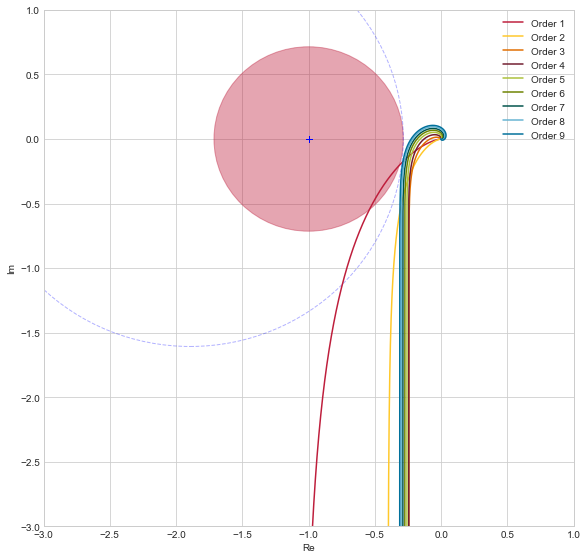

In [6]:
# Plot width and heigth in cm
plot_width = 19.
plot_height = 7.5

# Matplotlib plot
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')

# Make a system with TSum = 100 and T = TSum/order
TSum = 90.
L = 0
plt.clf()
fig2, ax2 = plt.subplots(1,figsize=(0.5*plot_width,0.5*plot_width))
ax2.cla()
row = 0
col = 0
for order in range(1,10):
    # Get the current time constant
    T = TSum/order
    print(T)
    # Make a transfer function
    G = cn.tf(1,[T,1])
    G = 1*G**order
    num,den = cn.pade(L,10)
    G = G*cn.tf(num,den)
    # Step experiment
    t = np.linspace(0,300,3000)
    y,t = cn.step(G,t)
    u = np.ones_like(t)
    # FOTD identification
    k,t,l = alg.Integral_Identification(y,u,t)
    # Make a controller
    c, b = alg.AMIGO_Tune(k,t,l)
    print(b)
    KY = cn.tf(c[0],1)+cn.tf(c[1],[1,0])
    KR = cn.tf(b*c[0],1)+cn.tf(c[1],[1,0])
    KR2 = cn.tf(c[0],1)+cn.tf(c[1],[1,0])
    # Open Loop
    OL = G*KR
    OL2 = G*KR2
    # Compute the sensitivity
    S = 1/(1+G*KY)
    # Complementary
    T = G*KR/(1+G*KY)
    # Compute the Open Loop Nyquist Plot
    real,imag, w = cn.nyquist(OL, np.logspace(-5,5,10000), Plot=False)
    real2,imag2,w = cn.nyquist(OL2,np.logspace(-5,5,1000), Plot=False)
    # Compute the maximum Sensitivity
    mag, phase, freq = cn.freqresp(S, np.logspace(-5,5,10000))
    #plt.loglog(freq,mag)
    MS = np.max(mag)
    # Compute the maximum Complementary Sensitivity
    mag, phase, freq = cn.freqresp(T,  np.logspace(-5,5,10000))
    MT = np.max(mag)
    # Second plot
    ax2.plot(-1,0,'b+')
    if order == 9:
        ax2.add_artist(MSC(1.4,TUBScolorscale[1]))
        ax2.add_artist(MCC(1.4))
    ax2.plot(real,imag,color=TUBScolorscale[order], label='Order '+str(order))
    ax2.set_xlim(-3,1)
    ax2.set_ylim(-3,1)
    ax2.set_xlabel('Re')
    ax2.set_ylabel('Im')
    ax2.legend(loc="upper right")
    if order%3 != 0:
        row = row
        col = col+1
    else:
        row = row+1
        col = 0
plt.savefig('../Latex/Graphics/PTN_example_2.svg')
plt.show()

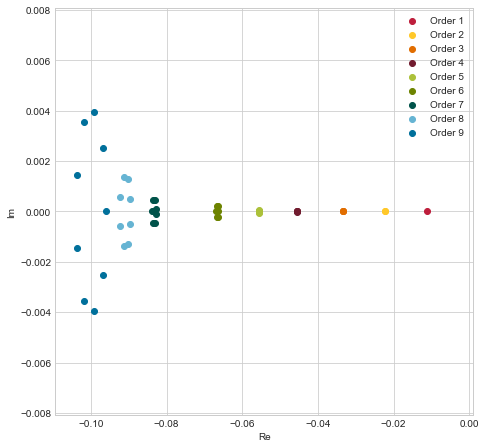

In [20]:
TSum = 90
# Plot width and heigth in cm
plot_width = 19.
plot_height = 7.5
# Matplotlib plot
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')

plt.clf()
fig2, ax2 = plt.subplots(1,figsize=(plot_height,plot_height))
ax2.cla()
for i in range(1,10):
    G = cn.tf(1,[TSum/i,1])
    G = G**i
    poles = cn.matlab.pole(G)
    ax2.scatter(np.real(poles), np.imag(poles), color = TUBScolorscale[i], label="Order "+str(i))
ax2.legend(loc="upper right")
ax2.set_xlabel("Re")
ax2.set_ylabel("Im")
plt.savefig("../Latex/Graphics/Poles_PTN_Example.svg")
plt.show()